<div style="position: relative;">
<img src="https://user-images.githubusercontent.com/7065401/98728503-5ab82f80-2378-11eb-9c79-adeb308fc647.png"></img>

<h1 style="color: white; position: absolute; top:27%; left:10%;">
     Software Development with Python
</h1>

<h3 style="color: #ef7d22; font-weight: normal; position: absolute; top:55%; left:10%;">
    David Mertz, Ph.D.
</h3>

<h3 style="color: #ef7d22; font-weight: normal; position: absolute; top:62%; left:10%;">
    Data Scientist
</h3>
</div>

# Introspecting Python objects



At runtime, we can find out a great deal about every Python object.  Many of these capabilities are available within builtin functions, or standard "dunder" attributes of objects.  But the `inspect` module makes working with them programmaticly easier.  Again, we will mostly look at examples from the Fractal library.

In [1]:
import sys
import inspect
sys.path.append('../Fractal')

In [2]:
import fractal
from fractal.mandelbrot import mandelbrot
from fractal.julia import julia
from fractal.sequences import scatter
from fractal import sierpiński
from fractal import koch
from fractal.visualize import make_canvas, visualize

A certain introspection is available just with the `dir()` builtin function.  This only gives us the names of attributes of objects.  Many of these will be inherited from the generic `object`.

In [3]:
dir(mandelbrot)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

## Inspecting membes

Using `inspect.getmembers()` can get us additional information about attributes, specifically what *type* of object is assigned to those attributes, or often a specific instance.  The globals of the function `mandelbrot` contains everything in the surrounding scope, which is too much to show. Let us exclude that.

In [4]:
[m for m in inspect.getmembers(mandelbrot) if m[0] != '__globals__']

[('__annotations__', {'z0': complex, 'orbits': int, 'return': int}),
 ('__call__',
  <method-wrapper '__call__' of function object at 0x7f302408fc10>),
 ('__class__', function),
 ('__closure__', None),
 ('__code__',
  <code object mandelbrot at 0x7f3024090500, file "../Fractal/fractal/mandelbrot.py", line 6>),
 ('__defaults__', (255,)),
 ('__delattr__',
  <method-wrapper '__delattr__' of function object at 0x7f302408fc10>),
 ('__dict__', {}),
 ('__dir__', <function function.__dir__()>),
 ('__doc__',
  'Find the escape orbit of points under Mandelbrot iteration\n\n    >>> mandelbrot(0.0965-0.638j)\n    17\n\n    # Might need to increase orbits to resolve some points\n    >>> mandelbrot(0.106225-0.6376125j, orbits=1000)\n    291\n\n    # If z0 isn\'t coercible to complex, TypeError\n    >>> mandelbrot(\'X\')\n    Traceback (most recent call last):\n      File "<stdin>", line 1, in <module>\n      File "/home/davidmertz/git/INE/unittest/01-Doctest/mandelbrot1.py", line 4, in mandelbrot\n 

Very often, we would like to narrow down the kinds of attributes that interst us.  Various predictes are provided in the `inspect` module.  We can define our own predictate about the value too, if we like.

In [5]:
inspect.getmembers(fractal.visualize, inspect.isfunction)

[('make_canvas',
  <function fractal.visualize.make_canvas(fn, x, y, size, pixels, kws={})>),
 ('visualize',
  <function fractal.visualize.visualize(canvas, stretch_palette=False, cmap='viridis')>)]

In [6]:
inspect.getmembers(fractal.visualize, inspect.ismodule)

[('np',
  <module 'numpy' from '/home/dmertz/miniconda3/envs/INE/lib/python3.8/site-packages/numpy/__init__.py'>),
 ('plt',
  <module 'matplotlib.pyplot' from '/home/dmertz/miniconda3/envs/INE/lib/python3.8/site-packages/matplotlib/pyplot.py'>)]

In [7]:
inspect.getmembers(fractal.visualize, lambda v: isinstance(v, str))

[('__cached__', '../Fractal/fractal/__pycache__/visualize.cpython-38.pyc'),
 ('__file__', '../Fractal/fractal/visualize.py'),
 ('__name__', 'fractal.visualize'),
 ('__package__', 'fractal')]

Not only modules and functions can be inspected, also, for example, frames can be.  Any object that exists in Python, in fact.

In [8]:
inspect.getmembers(sys._getframe(), inspect.isframe)

[('f_back',
  <frame at 0x55e441655ac0, file '/home/dmertz/miniconda3/envs/INE/lib/python3.8/site-packages/IPython/core/interactiveshell.py', line 3418, code run_code>)]

## Inspecting things besides members

In [9]:
print(type(sierpiński))
print(inspect.getdoc(sierpiński))

<class 'module'>
Draw Sierpiński fractals

Unlike some other fractals, evaluating a single point for membership 
is dramatically inefficient.  Creating an entire canvas is more direct


In [10]:
for name, fn in inspect.getmembers(sierpiński, inspect.isfunction):
    print(name, "|", inspect.signature(fn))
    print()
    print(inspect.getdoc(fn))
    print('-'*60)

carpet | (pixels: int = 800, N: int = 5) -> numpy.ndarray

Draw a Sierpiński carpet of `N` iterations on canvas of size `pixels`

More than 255 iterations are not be legible, and are not allowed.
For this implementation, a different value is given for each removal.

Encode points inside the carpet as 0.  
Encode points removed from carpet at iteration n as value n.

>>> canvas = carpet(500, N=6)
>>> canvas.shape
(500, 500)
------------------------------------------------------------
gasket | (pixels: int = 729, N: int = 5) -> numpy.ndarray

Draw a Sierpiński gasket of `N` iterations on canvas of size `pixels`

More than 255 iterations are not be legible, and are not allowed.
For this implementation, an increasing value is given for each removal.

Encode points inside the gasket as 0.  
Encode points removed from gasket at iteration n as value n.

>>> pixels, N = 500, 6
>>> canvas = gasket(pixels, N)
>>> canvas.shape
(500, 500)

Each iteration adds 1/9th remaining points, but also incre

We can find out the nature of individual parameters to a function or method, as a separate question from the general signature.

In [11]:
for param in inspect.signature(scatter).parameters.values():
    print(param.name, param.kind)

seq1 POSITIONAL_ONLY
seq2 POSITIONAL_ONLY
pixels POSITIONAL_OR_KEYWORD
ncolor KEYWORD_ONLY


Let us look at the actual source of this function to understand why its parameters are of varying kinds.  We could ask about parameters even of a function written in C, not only pure Python ones.  For external functions, we will raise an exception trying to get their source code.

In [12]:
print(inspect.getsource(scatter))

def scatter(seq1, seq2, /, pixels=800, *, ncolor=16):
    canvas = np.zeros(shape=(pixels, pixels), dtype=np.uint8)
    color = 1   
    while True:
        x, y = seq1.get_one(), seq2.get_one()
        if max(x, y) >= pixels:
            break
        canvas[x, y] = color
        color += 1  # Cycle through 15 non-zero colors
        color = 1 if color >= ncolor else color

    return canvas



In [13]:
for param in inspect.signature(isinstance).parameters.values():
    print(param.name, param.kind)

obj POSITIONAL_ONLY
class_or_tuple POSITIONAL_ONLY


## Type hints are special

Since Python 3.7, if modules contain an `from __future__ import annotations`, annotations are treated in a special way. They are not evaluated immediately when the module is compiled to bytecode.  This behavior becomes the default with Python 3.10 and above.  It's a subtle difference used by optional type checking tools, but something to be aware of if you inspect annotations.

For example, `julia.py` has this future directive, but `mandelbrot.py` does not.

In [14]:
mandelbrot.__annotations__

{'z0': complex, 'orbits': int, 'return': int}

In [15]:
julia.__annotations__

{'z': 'complex', 'c': 'complex', 'orbits': 'int', 'return': 'int'}

In [16]:
from typing import get_type_hints

In [17]:
get_type_hints(julia)

{'z': complex, 'c': complex, 'orbits': int, 'return': int}

In [18]:
get_type_hints(mandelbrot)

{'z0': complex, 'orbits': int, 'return': int}

`inspect.signature()` returns the raw form of annotations as strings.

In [19]:
inspect.signature(julia)

<Signature (z: 'complex', c: 'complex' = (-0.1+0.65j), orbits: 'int' = 255) -> 'int'>

## Inspecting class hierarchies

The function `inspect.getclasstree()` takes an iterable of zero or more classes to produce an inheritance graph.

In [20]:
ZeroDivisionError.__mro__

(ZeroDivisionError, ArithmeticError, Exception, BaseException, object)

In [21]:
str(ZeroDivisionError)

"<class 'ZeroDivisionError'>"

In [22]:
inspect.getclasstree([ZeroDivisionError])

[(ArithmeticError, (Exception,)), [(ZeroDivisionError, (ArithmeticError,))]]

Let's try that with a moderately large collection of classes that are available in `matplotlib`.

In [23]:
import matplotlib.pyplot as plt
classes = [k[1] for k in inspect.getmembers(plt, inspect.isclass)]
plt_hierarchy = inspect.getclasstree(classes)
plt_hierarchy

[(list, (object,)),
 [(matplotlib.cbook.silent_list, (list,))],
 (object, ()),
 [(matplotlib.artist.Artist, (object,)),
  [(matplotlib.figure.Figure, (matplotlib.artist.Artist,)),
   (matplotlib.lines.Line2D, (matplotlib.artist.Artist,)),
   (matplotlib.text.Text, (matplotlib.artist.Artist,)),
   [(matplotlib.text.Annotation,
     (matplotlib.text.Text, matplotlib.text._AnnotationBase))]],
  (matplotlib.backend_bases.FigureCanvasBase, (object,)),
  (matplotlib.colors.Normalize, (object,)),
  (matplotlib.ticker.TickHelper, (object,)),
  [(matplotlib.ticker.Formatter, (matplotlib.ticker.TickHelper,)),
   [(matplotlib.ticker.FixedFormatter, (matplotlib.ticker.Formatter,)),
    (matplotlib.ticker.FormatStrFormatter, (matplotlib.ticker.Formatter,)),
    (matplotlib.ticker.FuncFormatter, (matplotlib.ticker.Formatter,)),
    (matplotlib.ticker.LogFormatter, (matplotlib.ticker.Formatter,)),
    [(matplotlib.ticker.LogFormatterExponent,
      (matplotlib.ticker.LogFormatter,)),
     (matplotlib

So far, so good.  We certainly might work with that programmatically. In fact, let's write a short program to produce a visual graph of this hierarchy.

In [24]:
def dot_inheritance(classtree, edges=set()):
    for item in classtree:
        if isinstance(item, tuple):
            child, parents = item
            for parent in parents:
                edges.add(f"{child.__name__} -> {parent.__name__};")
        else:
            dot_inheritance(item, edges)

    dotfile = "digraph {\n  %s\n}" % "\n  ".join(edges)
    return dotfile    

In [25]:
with open('plt_hierarchy.dot', 'w') as dot:
    print(dot_inheritance(plt_hierarchy), file=dot)
!dot plt_hierarchy.dot -Tpng -Grankdir=LR > plt_hierarchy.png

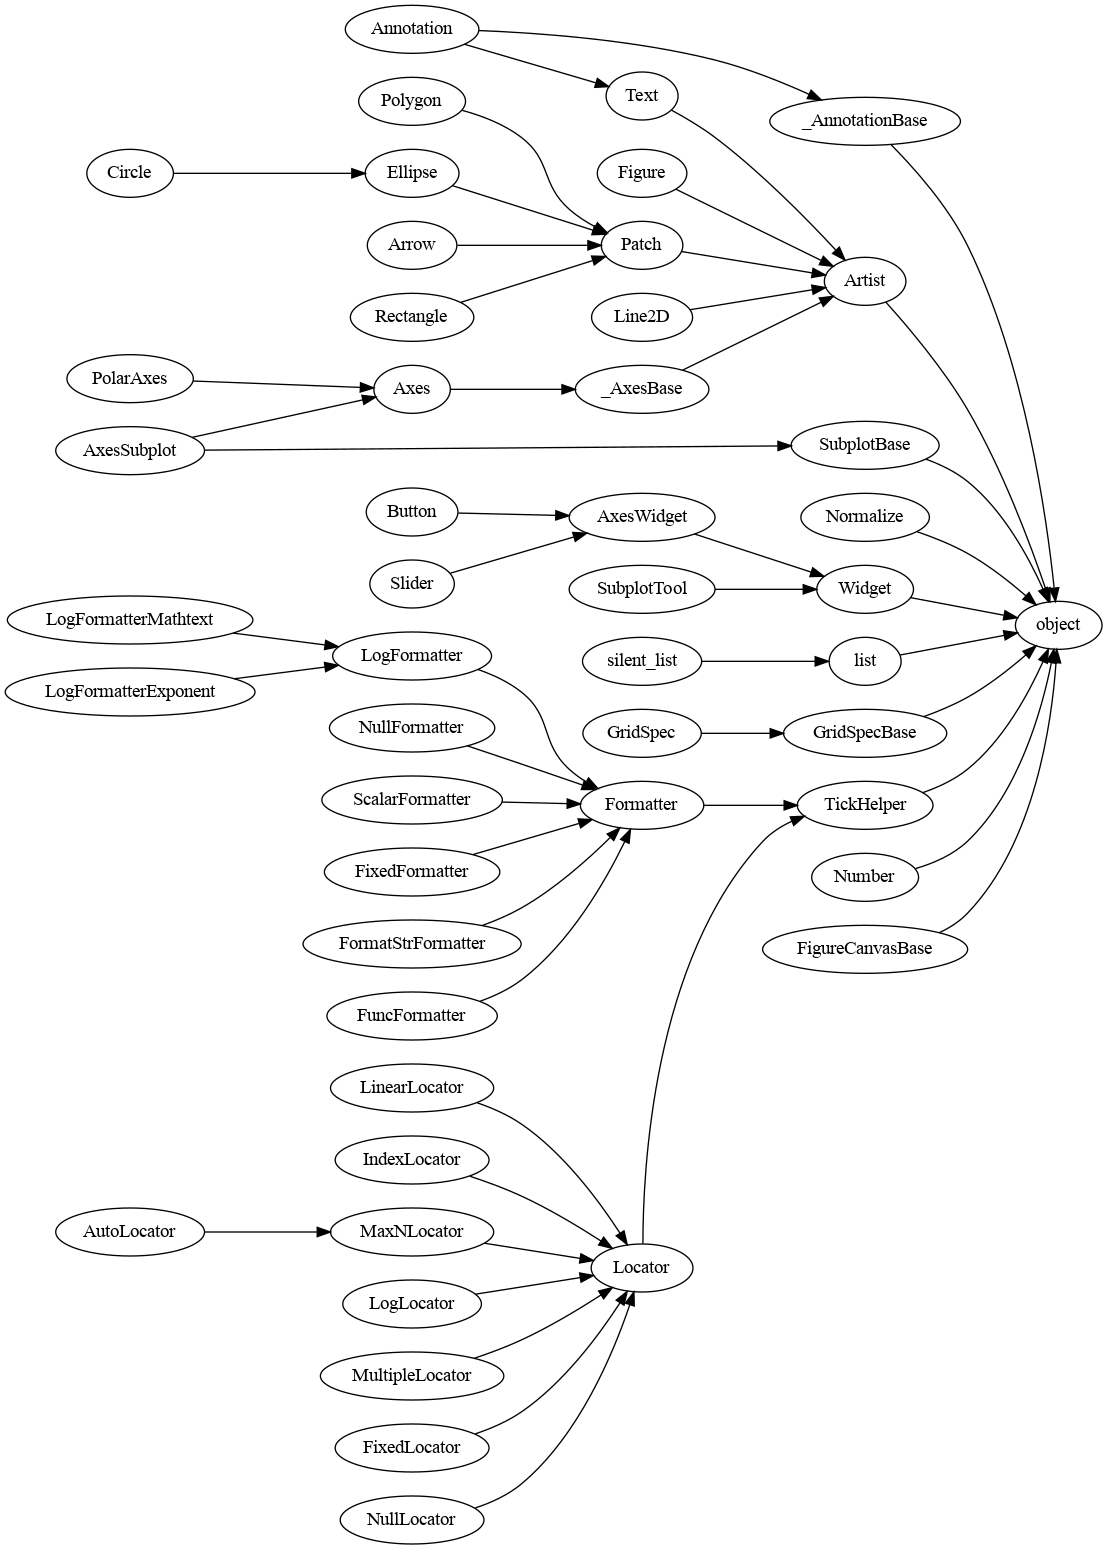

In [26]:
from IPython.display import Image
Image("plt_hierarchy.png", width=800)